In [2]:
%matplotlib notebook
import sympy as s
import math as m
import matplotlib.pyplot as plt
import scipy.integrate as sc
import numpy as np
from sympy import init_printing
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
init_printing()
rc('text', usetex = True)

##  Tracé de la chute libre en coordonnée de Schwarzschild

On part de l'équation liant $\tau$ et r pour une particule donné
dans le poly : 

\begin{equation}
\boxed{\frac{1}{2}\left(\frac{dr}{d\tau}\right)^{2}+V(r)=\frac{1}{2}\left(\frac{l{^{2}}}{c{^{2}}}-c{^{2}}\right)=\frac{1}{2}\tilde{E{{}^2}}}
\end{equation}

avec 

$$
2V(r)=\left(1-\frac{R_{s}}{r}\right)\left(c{{}^2}+\frac{l{{}^2}}{r{{}^2}}\right)-c{{}^2}
$$

On a donc : 
\begin{equation}
\boxed{\tau=\int d\tau=\int\frac{dr}{\sqrt{\tilde{E{{}^2}}-\left(1-\frac{R_{s}}{r}\right)\left(c{{}^2}+\frac{l{{}^2}}{r{{}^2}}\right)+c{{}^2}}}}\label{eq:2}
\end{equation}

Pour une particule en chute libre, on a : $l=0$, ce qui simplifie
V(r) :

\begin{equation}
\tau=\int\frac{dr}{\sqrt{\frac{R_{s}}{r}-\frac{R_{S}}{R}}}\label{eq:3}
\end{equation}

Où R correspond au rayon où la particule a une vitesse nulle, $R=\frac{R_{s}}{E{{}^2}}$.

On fait le changement de variable suivant dans l'intégrale
: $r=\frac{R}{2}\left(1+cos(\eta)\right),$d'où $dr=-\frac{R}{2}sin(\eta)d\eta$
et $\eta\in\left[0,\pi\right]$.

\begin{align*}
\tau & =\frac{R}{2\sqrt{R_{s}}}\int\frac{d\eta sin(\eta)}{\sqrt{\frac{2}{R(1+cos(\eta)}-1/R}}\\
 & =\frac{R}{2\sqrt{R_{s}}}\int\sqrt{\frac{R(1+cos(\eta)}{1-cos(\eta)}}sin(\eta)d\eta\\
 & =\frac{R}{2}\sqrt{\frac{R}{R_{s}}}\int(1+cos(\eta))d\eta\\
 & =\frac{R}{2}\sqrt{\frac{R}{R_{s}}}(\eta+sin(\eta))
\end{align*}

On ainsi : 
\begin{equation}
\boxed{\begin{cases}
\tau & =\frac{R}{2}\sqrt{\frac{R}{R_{s}}}(\eta+sin(\eta))\\
r & =\frac{R}{2}\left(1+cos(\eta)\right)
\end{cases}}\label{eq:4}
\end{equation}

Pour l'équation de la chute libre. 

Le temps total de chute libre vaut alors : $\tau_{ff}=\frac{\pi2}{}R\sqrt{\frac{R}{R_{S}}}.$
Il correspond au temps intégré entre $\eta=0$ et $\eta=\pi$.

Pour un observateur quelconque : $\frac{dr}{d\tau}=\frac{dr}{dt}\frac{dt}{d\tau}=\frac{dr}{dt}\frac{\sqrt{1-\frac{R_{s}}{r_{0}}}}{1-\frac{R_{s}}{r}}$.

D'où : 
\begin{align*}
t & =\int dt=\int d\tau\frac{\sqrt{1-\frac{R_{s}}{r_{0}}}}{1-\frac{R_{s}}{r}}\\
 & =\int\frac{dr}{\sqrt{\tilde{E{{}^2}}-\left(1-\frac{R_{s}}{r}\right)\left(c{{}^2}+\frac{l{{}^2}}{r{{}^2}}\right)+c{{}^2}}}\frac{\sqrt{1-\frac{R_{s}}{r_{0}}}}{1-\frac{R_{s}}{r}}\\
 & =\int\frac{dr}{\sqrt{\frac{R_{s}}{r}-\frac{R_{S}}{r_{0}}}}\frac{\sqrt{1-\frac{R_{s}}{r_{0}}}}{1-\frac{R_{s}}{r}}
\end{align*}

Cette intégrale n'est pas évidente à calculer, la résolution est due
à Khuri (1957) et donne : 

\begin{equation}
\boxed{t=\left[\left(\frac{R}{2}+R_{s}\right)\sqrt{\frac{R}{R_{s}}-1}\right]\eta+\frac{R}{2}\sqrt{\frac{R}{R_{s}}-1}sin(\eta)+R_{s}ln\left|\frac{\sqrt{\frac{R}{R_{s}}-1}+tan(\eta)}{\sqrt{\frac{R}{R_{s}}-1}-tan(\eta)}\right|}
\end{equation}

Ici, $\eta$ est le même paramètre que celui qui apparaît précédemment.


### Intégration de la dernière intégrale à l'aide d'un intégrateur numérique

In [ ]:
eta = s.symbols('eta')
t = s.Function("t")
w0 = s.symbols('w0')
R_s = s.symbols('R_s')
r_0 = s.symbols('r_0')
E = s.symbols('E')
eq = t(eta).diff(eta, 1) - E /s.sqrt(R_s/(r_0/2 * (1+s.cos(eta))-R_s/r_0)) / (1-R_s/(r_0/2 * (1+s.cos(eta)))) * r_0/2 * s.sin(eta)
w_sol = s.dsolve(eq, t(eta), ics = {t(0) : 0})
print(s.latex(w_sol))

<IPython.core.display.Javascript object>


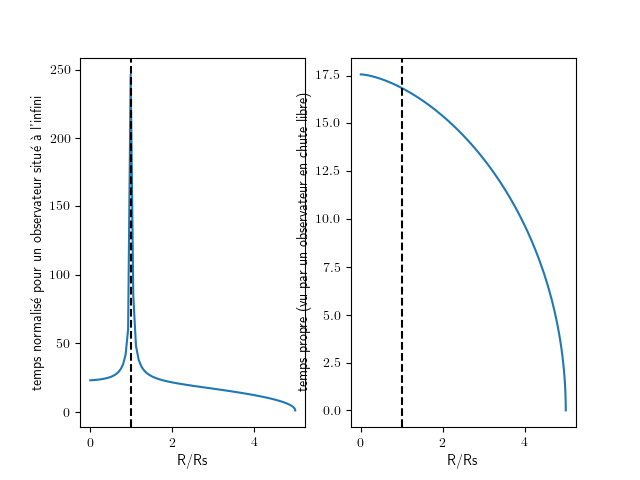

In [23]:
r_max = 5  #rayon de départ de la chute libre
M = 1/2     #masse du trou noir, corrspond à un rayon de l'horizon de 1
def r(eta):  #retourne r en fonction de eta
    return r_max/2 * (1 + np.cos(eta)) 
def tau(eta):   #temps propre
    return np.sqrt(r_max**3 / (8*M)) * (eta + np.sin(eta))
def t(eta):  #temps pour un observateur à l'infini
    return 2*M*np.absolute( (np.sqrt(r_max/(2*M)-1) + np.tan(eta/2)) / (np.sqrt(r_max/(2*M)-1) - np.tan(eta/2))) + 2*M*np.sqrt(r_max/(2*M)-1) * (eta + (r_max/(4*M) * (eta + np.sin(eta))))


eta = np.linspace(0, np.pi, 100)  #paramètre des courbes
Tau = tau(eta)   #temps propre
R = r(eta)     #rayon
T = t(eta)    #temps pour un observateur à l'infini

plt.figure()
plt.title("Chute libre d'une particule matérielle dans un trou noir de Schwarzschild")

plt.subplot(1,2,1)
plt.plot(R, T)
plt.axvline(x=2*M,color='black',linestyle='--', label = 'R_S') 
plt.ylabel("temps normalisé pour un observateur situé à l'infini")
plt.xlabel('R/Rs')
plt.subplot(1,2,2)
plt.plot(R, Tau)
plt.axvline(x=2*M,color='black',linestyle='--', label = 'R_S') 
plt.ylabel("temps propre (vu par un observateur en chute libre)")
plt.xlabel('R/Rs')
plt.show()

Le cas le plus simple pour décrire une étoile en effondrement est
celle d'une étoile ayant une densité uniforme et une pression interne
nulle. Il décrit ainsi une ``boule de poussière'' en effondremenr
gravitationnel. Ce modèle a été développé par Oppenheimer et Sydner
en 1939.

Comme les particules ne sont soumises à aucune pression liées aux
autres particules, elles vont suivre des trajectoires géodésiques.
En particulier, les particules situées à la surface vont suivre les
géodésiques dans une géométrie de Schwarzschild car elles sont à l'extérieur
de la ``boule de poussière''. Pour une telle boule dont la surface
initiale est située à un rayon fini $R=R_{i}$ eu temps $t=0$, le
mouvement de sa surface est donné par (cf chute libre de Schwarzschild)
: 
$$
\begin{cases}
\tau & =\frac{R}{2}\sqrt{\frac{R}{R_{s}}}(\eta+sin(\eta))\\
r & =\frac{R}{2}\left(1+cos(\eta)\right)
\end{cases}
$$

Le temps total de chute libre pour une horloge situé à la surface
est donné par :
$
\tau_{ff}=\frac{\pi}{2}R\sqrt{\frac{R}{R_{S}}}
$

L'intérieur de l'étoile est supposé homogène et isotropique en tout
point à l'exception de la surface, ie un intérieur identique à un
modèle fermé ($k=1)$ d'univers de Friemann. L'étoile est au repos
initialement, ce qui correspond au moment de maximale expansion. 

## Métrique de Friedmann :

Cette métrique décrit un univers de taille a(t). En utilsant des coorconnées
comobiles $\chi,\theta ,\varphi$ :$ $

On prend $d\Omega{{}^2}=d\theta{{}^2}+sin{{}^2}(\theta)d\varphi^{2}$
\begin{align*}
ds{{}^2} & =-dt{{}^2}+a{{}^2}(\tau)\left(d\chi{{}^2}+sin{{}^2}(\chi)d\Omega{{}^2}\right)\\
\end{align*}

Le paramètre $a(\tau)$ est donné par la relation de la chute libre
: 

$$
a(\tau)=\frac{a_{m}}{2}\left(1+cos(\eta\right)
\\
\tau(\eta)=\frac{a_{m}}{2}(\eta+sin(\eta))
$$

En coordonnées sphérique, on a, avec $r=asin(\chi)$ :

$$
ds^{2}=-dt{{}^2}+\left(\frac{dr{{}^2}}{1-\left(\frac{r}{a(\tau)}\right){{}^2}}+r{{}^2}d\Omega{{}^2}\right)
$$

Finalement, cette solution décrit bien l'intérieur de l'étoile en
effondrement. Il y a seulement une grosse difficulté. Dans le cas
cosmologique de l'univers de Friedmann, la solution était homogène
et isotropique en tout point. Ici, l'homogénéité et l'isotropie sont
violée à la surface de l'étoile. Les conditions de raccord avec l'extérieur
doivent assurer la continuité de la métrique et ne sont pas triviale. 
